* ! pip install tree
* from tree import *

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
%matplotlib inline

## Introduction to Decision Trees:

Decision trees are machine learning models that try to find patterns in the features of data points. Take a look at the tree on this page. This tree tries to predict whether a student will get an A on their next test.

By asking questions like “What is the student’s average grade in the class” the decision tree tries to get a better understanding of their chances on the next test.

In order to make a classification, this classifier needs a data point with four features:

The student’s average grade in the class.
The number of hours the student plans on studying for the test.
The number of hours the student plans on sleeping the night before the test.
Whether or not the student plans on cheating.
For example, let’s say that somebody has a “B” average in the class, studied for more than 3 hours, slept less than 5 hours before the test, and doesn’t plan to cheat. If we start at the top of the tree and take the correct path based on that data, we’ll arrive at a leaf node that predicts the person will not get an A on the next test.

In this course, you’ll learn how to create a tree like this!

### Cars
In this lesson, we’ll create a decision tree build off of a dataset about cars. When considering buying a car, what factors go into making that decision?

Each car can fall into four different classes which represent how satisfied someone would be with purchasing the car — unacc (unacceptable), acc (acceptable), good, vgood.

Each car has 6 features:

* The price of the car which can be "vhigh", "high", "med", or "low".
* The cost of maintaining the car which can be "vhigh", "high", "med", or "low".
* The number of doors which can be "2", "3", "4", "5more".
* The number of people the car can hold which can be "2", "4", or "more".
* The size of the trunk which can be "small", "med", or "big".
* The safety rating of the car which can be "low", "med", or "high".

We’ve imported a dataset of cars behind the scenes and created a decision tree using that data. In this lesson, you’ll learn how to build that tree yourself, but for now, let’s see what the tree can do!

### Q1
Create a variable named car. We’re going to be feeding car into tree, the decision tree we’ve made behind the scenes. car should be a list of six items — one value for each feature.

Try to make is a car that you think would have the label vgood and we’ll see if the decision tree agrees with you!

Make sure your features are in the order listed above.

In [3]:
car = ['low', 'vhigh','4','4','big','high']

### Gini Impurity
Consider the two trees below. Which tree would be more useful as a model that tries to predict whether someone would get an A in a class?
Let’s say you use the top tree. You’ll end up at a leaf node where the label is up for debate. The training data has labels from both classes! If you use the bottom tree, you’ll end up at a leaf where there’s only one type of label. There’s no debate at all! We’d be much more confident about our classification if we used the bottom tree.

This idea can be quantified by calculating the Gini impurity of a set of data points. To find the Gini impurity, start at 1 and subtract the squared percentage of each label in the set. For example, if a data set had three items of class A and one item of class B, the Gini impurity of the set would be

1 - (3/4)** 2 - (1/4)** 2 = 0.375


If a data set has only one class, you’d end up with a Gini impurity of 0. The lower the impurity, the better the decision tree!



## Ques 1
Let’s find the Gini impurity of the set of labels we’ve given you.

Let’s start by creating a variable named impurity and set it to 1.

In [42]:
labels = ["unacc", "unacc", "acc", "acc", "good", "good"]
impurity = 1

### Ques 2
We now want to count up how many times every unique label is in the dataset. 

In [43]:
label_counts = {}
for i in labels:
    if i not in label_counts:
        label_counts[i] = 1
    else:
        label_counts[i] += 1 

### Ques 3
Let’s find the probability of each label given the dataset. Loop through each label in label_counts.

Inside the for loop, create a variable named probability_of_label. Set it equal to the label count divided by the total number of labels in the dataset.

For every label, the count associated with that label can be found at label_counts[label].

We can find the total number of labels in the dataset with len(labels).

In [44]:
for label in label_counts:
    probability_of_label = label_counts[label]/len(labels)
    

In [45]:
probability_of_label

0.3333333333333333

### Q4
We now want to take probability_of_label, square it, and subtract it from impurity.

Inside the for loop, subtract probability_of_label squared from impurity.

In Python, you can square x by using x ** 2.

In [46]:
for label in label_counts:
    probability_of_label = label_counts[label]/len(labels)
    impurity -= (probability_of_label ** 2) 

In [47]:
impurity

0.6666666666666665

### Q5 
Outside of the for loop, print impurity.

Test out some of the other labels that we’ve given you by uncommenting them. Which one do you expect to have the lowest impurity?

In the next exercise, we’ll put all of your code into a function. If you want a challenge, try creating the function yourself! Ours is named gini(), takes labels as a parameter, and returns impurity.

In [49]:
#labels = ["unacc","unacc","unacc", "good", "vgood", "vgood"]
#labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc"]
impurity = 1
label_counts = Counter(labels)
print(label_counts)

for label in label_counts:
    probability_of_label = label_counts[label]/ len(labels)
    impurity -= (probability_of_label ** 2)
print(impurity)

Counter({'unacc': 6})
0.0


* The dataset that has only one type of label should have an impurity of 0

## Information Gain:
We know that we want to end up with leaves with a low Gini Impurity, but we still need to figure out which features to split on in order to achieve this. For example, is it better if we split our dataset of students based on how much sleep they got or how much time they spent studying?

To answer this question, we can calculate the information gain of splitting the data on a certain feature. Information gain measures difference in the impurity of the data before and after the split. For example, let’s say you had a dataset with an impurity of 0.5. After splitting the data based on a feature, you end up with three groups with impurities 0, 0.375, and 0. The information gain of splitting the data in that way is 0.5 - 0 - 0.375 - 0 = 0.125.



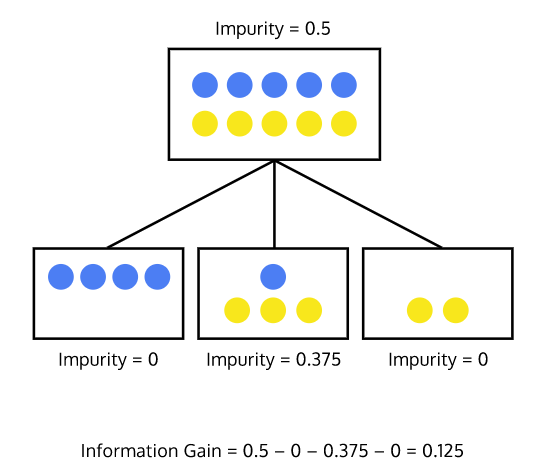

In [84]:
Image('four.png')

Not bad! By splitting the data in that way, we’ve gained some information about how the data is structured — the datasets after the split are purer than they were before the split. The higher the information gain the better — if information gain is 0, then splitting the data on that feature was useless! Unfortunately, right now it’s possible for information gain to be negative. In the next exercise, we’ll calculate weighted information gain to fix that problem.

### Q 1
We’ve given you a set of labels named unsplit_labels and two different ways of splitting those labels into smaller subsets. Let’s calculate the information gain of splitting the labels in this way.

At the bottom of your code, begin by creating a variable named info_gain. info_gain should start at the Gini impurity of the unsplit_labels.

In [51]:
from collections import Counter

unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [
  ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
  [ "good", "good"], 
  ["vgood", "vgood"]
]

split_labels_2 = [
  ["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
  ["vgood", "vgood", "vgood"]
]

def gini(dataset):
    impurity = 1
    label_counts = Counter(dataset)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(dataset)
        impurity -= prob_of_label ** 2
    return impurity

In [53]:
info_gain = gini(unsplit_labels)
print(info_gain)

0.6390532544378698


### Ques 2

We now want to subtract the impurity of each subset in split_labels_1 from info_gain.

Loop through every subset in split_labels_1. We want to change the value of info_gain.

For every subset, calculate the Gini impurity and subtract it from info_gain.

In [54]:
for subset in split_labels_1:
    info_gain -= gini(subset)

### Ques 3
Outside of your loop, print info_gain.

We’ve given you a second way to split the data. Instead of looping through the subsets in split_labels_1, loop through the subsets in split_labels_2.

Which split resulted in more information gain?

Once again, in the next exercise, we’ll put the code you wrote into a function named information_gain that takes unsplit_labels and split_labels as parameters.

In [57]:
print(info_gain)

0.14522609394404257


## Weighted Information Gain

We’re not quite done calculating the information gain of a set of objects. The sizes of the subset that get created after the split are important too! For example, the image below shows two sets with the same impurity. Which set would you rather have in your decision tree?




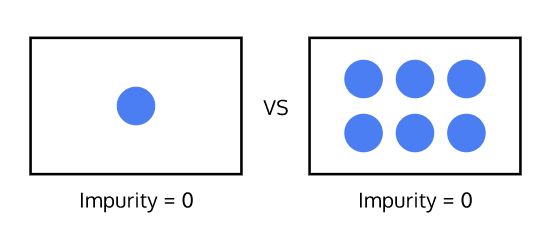

In [58]:
from IPython.display import Image
Image("one.png")

Both of these sets are perfectly pure, but the purity of the second set is much more meaningful. Because there are so many items in the second set, we can be confident that whatever we did to produce this set wasn’t an accident.

It might be helpful to think about the inverse as well. Consider these two sets with the same impurity:




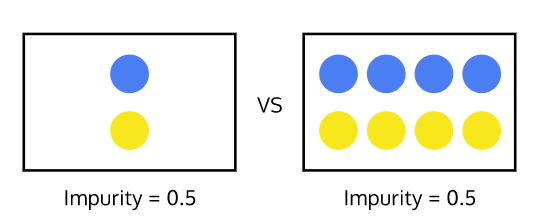

In [59]:
Image("two.png")

Both of these sets are completely impure. However, that impurity is much more meaningful in the set with more instances. We know that we are going to have to do a lot more work in order to completely separate the two classes. Meanwhile, the impurity of the set with two items isn’t as important. We know that we’ll only need to split the set one more time in order to make two pure sets.

Let’s modify the formula for information gain to reflect the fact that the size of the set is relevant. Instead of simply subtracting the impurity of each set, we’ll subtract the weighted impurity of each of the split sets. If the data before the split contained 20 items and one of the resulting splits contained 2 items, then the weighted impurity of that subset would be 2/20 * impurity. We’re lowering the importance of the impurity of sets with few elements.



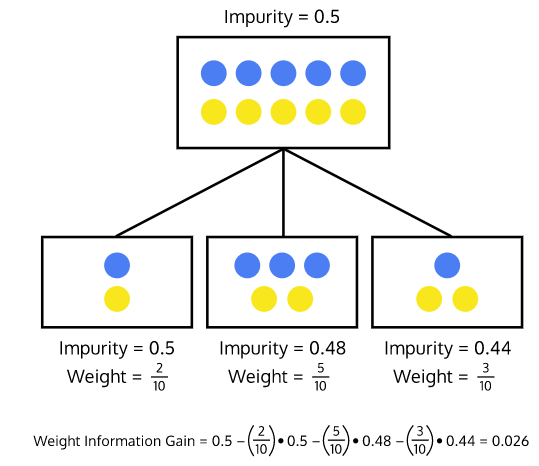

In [60]:
Image("three.png")

Now that we can calculate the information gain using weighted impurity, let’s do that for every possible feature. If we do this, we can find the best feature to split the data on.

In [61]:
from collections import Counter

cars = [['med', 'low', '3', '4', 'med', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low'], ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    # Multiply gini(subset) by the correct percentage below
    info_gain -= gini(subset)
  return info_gain


### Ques 1 
Let’s update the information_gain function to make it calculate weighted information gain.

When subtracting the impurity of a subset from info_gain, first multiply the impurity by the correct percentage.

The percentage should be the number of labels in the subset, len(subset), divided by the number of labels before the split, len(starting_labels).

In [62]:
def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    # Multiply gini(subset) by the correct percentage below
    info_gain -= gini(subset) * len(subset)/len(starting_labels)
  return info_gain

### Ques 2
We’ve given you a split() function along with ten cars and the car_labels associated with those cars.

After your information_gain() function, call split() using cars, car_labels and 3 as a parameter. This will split the data based on the third index (That feature was the number of people the car could hold).

split() returns two lists. Create two variables named split_data and split_labels and set them equal to the result of the split function.

We’ll explore what these variables contain in a second!



In [63]:
split_data, split_labels = split(cars, car_labels, 3)

### Ques 3
Take a look at what these variables are. Begin by printing split_data. It’s kind of hard to tell what’s going on there! There are so many lists of lists!

Try printing the length of split_data. What do you think this is telling you?

Also try printing split_data[0]. What do you notice about the items at index 3 of all these lists? (Remember, when we called split, we used 3 as the split index).

Try printing split_data[1]. What do you notice about the items at index 3 of these lists?

In [65]:
print(len(split_data))
print(split_data[0])
print(split_data[1])

3
[['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low']]
[['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['low', 'low', '2', '4', 'big', 'med']]


### Q4

We now know that split_data contains the cars split into different subsets. split_labels contains the labels of those cars split into different subsets.

Use those split labels to find the information gain of splitting on index 3! Remember, the information_gain() function takes a list of the labels before the split (car_labels), and a list of the subsets of labels after the split (split_labels).

Call this function and print the result! How did we do when we split the function on index 3?

In [66]:
print(information_gain(car_labels, split_labels))

0.3066666666666667


### Ques 5

We found the information gain when splitting on feature 3. Let’s do the same for every possible feature.

Loop through all of the features of our data to find the best one to split on! Each car has six features, so we want to loop through the indices 0 through 5.

Inside your for loop, call split() using the unsplit data, the unsplit labels, and the index that you’re looping through.

Call information_gain() using the resulting split labels and print the results. Which feature produces the most information gain?

In [68]:
for i in range(0, 6):
    split_data, split_labels = split(cars, car_labels, i)
    print(information_gain(car_labels, split_labels))

0.27333333333333343
0.04000000000000001
0.10666666666666669
0.3066666666666667
0.15000000000000002
0.29000000000000004


## Recursive Tree Building

Now that we can find the best feature to split the dataset, we can repeat this process again and again to create the full tree. This is a recursive algorithm! We start with every data point from the training set, find the best feature to split the data, split the data based on that feature, and then recursively repeat the process again on each subset that was created from the split.

We’ll stop the recursion when we can no longer find a feature that results in any information gain. In other words, we want to create a leaf of the tree when we can’t find a way to split the data that makes purer subsets.

The leaf should keep track of the classes of the data points from the training set that ended up in the leaf. In our implementation, we’ll use a Counter object to keep track of the counts of labels.

We’ll use these counts to make predictions about new data that we give the tree.

### Ques 1 
We’ve given you the function find_best_split() that takes a set of data points and a set of labels.

The function returns the index of the feature that causes the best split and the information gain caused by that split.

For now, at the bottom of your code, call this function using car_data and car_labels as parameters and store the values in variables named best_feature and best_gain.

Print those two variables. What was the best feature to split on and what was the information gain?

In [70]:

car_data = [['med', 'low', '3', '4', 'med', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low'], ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])):
        data_subsets, label_subsets = split(dataset, labels, feature)
        gain = information_gain(labels, label_subsets)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    return best_feature, best_gain

In [71]:
best_feature,best_gain =   find_best_split(car_data, car_labels) 
print(best_feature,best_gain)

3 0.3066666666666667


### Ques 2
Let’s create a function called build_tree() that takes data and labels as parameters.

Move your call of find_best_split() inside this function, but change the parameters from car_data and car_labels to data and labels.

If best_gain is 0, return a Counter object of labels. We’ve reached the base case — there’s no way to gain any more information so we want to create a leaf.

In [73]:
def build_tree(data, labels):
    best_feature, best_gain = find_best_split(data, labels)
    if best_gain == 0:
        return Counter(labels)

### Ques 3
After the if statement, we want to start working on the recursive case.

In the recursive case, we want to split the data into subsets using the best feature, and then recursively call the build_tree() function on those subsets to create subtrees. Finally, we want to return a list of all those subtrees.

Let’s begin by splitting the data. You can do this by using the split() function which takes three parameters — the data and labels that you want to split and the index of the feature you want to split on.

Store the result of the split() function in two variables named data_subsets and label_subsets.

For now, return data_subsets at the bottom of your function.

In [74]:
def build_tree(data, labels):
    best_feature, best_gain = find_best_split(data, labels)
    if best_gain == 0:
        return Counter(labels)
    data_subsets, label_subsets = split(data, labels, best_feature)


### Ques 5
Before that final return statement, create an empty list named branches. This list will store all of the subtrees we’re about to make from our recursive calls.

We now want to loop through all of the subsets of data and labels. Set up your for loop like this

Inside the for loop, call build_tree using data_subsets[i] and label_subsets[i] as parameters and append the result to branches.

Finally outside the for loop, return branches instead of data_subsets.

In [75]:
def build_tree(data, labels):
  best_feature, best_gain = find_best_split(data, labels)
  if best_gain == 0:
    return Counter(labels)
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
    branch = build_tree(data_subsets[i], label_subsets[i])
    branches.append(branch)
  return branches

## Classifying New Data

We can finally use our tree as a classifier! Given a new data point, we start at the top of the tree and follow the path of the tree until we hit a leaf. Once we get to a leaf, we’ll use the classes of the points from the training set to make a classification.

We’ve slightly changed the way our build_tree() function works. Instead of returning a list of branches or a Counter object, the build_tree() function now returns a Leaf object or an Internal_Node object. We’ll explain how to use these objects in the instructions!

Let’s write a function that will use our tree to classify new points!